In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from math import radians, cos, sin, asin, sqrt


import xgboost

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid

# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from mpl_toolkits import mplot3d


Using TensorFlow backend.


In [2]:
data = pd.read_csv("./housing_train.csv")


In [3]:
data.head(5)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al


In [4]:
df = data.copy()

# Clustering the lat long variables

In [5]:
from sklearn.cluster import KMeans

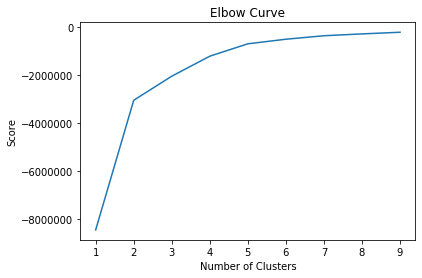

In [6]:
df = data.copy()
#removing the null values from lat and long columns
lat = df[~df["lat"].isna()]["lat"]
long = df[~df["long"].isna()]["long"]
lat_long = pd.DataFrame()
lat_long["lat"] = lat
lat_long["long"] = long



#elbow curve clustering  latirude, longitude variables 
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = lat_long[["lat"]]
X_axis = lat_long[["long"]]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()
#from the below elbow curve we ca see that beyond 3 clusters thers isnp

kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(lat_long[lat_long.columns[0:2]]) # Compute k-means clustering.
lat_long['cluster_label'] = kmeans.fit_predict(lat_long[lat_long.columns[0:2]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(lat_long[lat_long.columns[0:2]]) # Labels of each point
lat_long.head(10)
df = df[~df["lat"].isna()]

df.drop(["lat", "long"], inplace = True, axis = 1)

In [7]:
list(df.columns)

['id',
 'url',
 'region',
 'region_url',
 'price',
 'type',
 'sqfeet',
 'beds',
 'baths',
 'cats_allowed',
 'dogs_allowed',
 'smoking_allowed',
 'wheelchair_access',
 'electric_vehicle_charge',
 'comes_furnished',
 'laundry_options',
 'parking_options',
 'image_url',
 'description',
 'state']

# Preprocess data

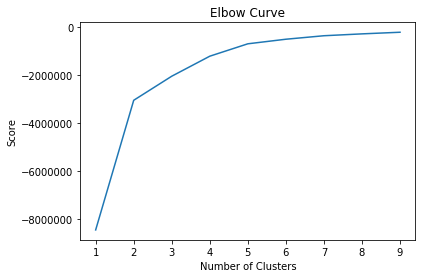

In [8]:
df = data.copy()

##################### CLustering Lat long variables by kmeans clustring #####################
#removing the null values from lat and long columns
lat = df[~df["lat"].isna()]["lat"]
long = df[~df["long"].isna()]["long"]
lat_long = pd.DataFrame()
lat_long["lat"] = lat
lat_long["long"] = long



#elbow curve clustering  latirude, longitude variables 
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = lat_long[["lat"]]
X_axis = lat_long[["long"]]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()
#from the below elbow curve we ca see that beyond 3 clusters thers isnp

kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(lat_long[lat_long.columns[0:2]]) # Compute k-means clustering.
lat_long['cluster_label'] = kmeans.fit_predict(lat_long[lat_long.columns[0:2]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(lat_long[lat_long.columns[0:2]]) # Labels of each point
lat_long.head(10)
df = df[~df["lat"].isna()]

df.drop(["lat", "long"], inplace = True, axis = 1)

def preprocess(df):
    #filling null values
    df["laundry_options"].fillna(df["laundry_options"].mode()[0], inplace = True)
    df["parking_options"].fillna(df["parking_options"].mode()[0], inplace = True)
    df["state"].fillna(df["state"].mode(), inplace = True)

    df["cluster"] = lat_long["cluster_label"]
    df.drop(["id", "url", "region_url", "description", "region_url"], inplace = True, axis = 1)
    
    #ordinal data
    for i, el in enumerate(df["laundry_options"].unique()[::-1]):
        df[df["laundry_options"] == el] = i
    arr = ["no_parking", "off_street_parking", "street parking", "valetparking", "detached garage", "carport", "attached garage"]
    for i, el in enumerate(arr):
        df[df["parking_options"] == el] = i


    #dummy values for nominal data
    ord_col = ["type",  "region"]
    for i in ord_col:
        temp = pd.get_dummies(df[i], drop_first = True, prefix = i)
        df = pd.concat([df, temp], axis = 1)
        df.drop([i], axis = 1, inplace = True)
    return df

df = preprocess(df.copy())
 

# Trai test spilt


In [23]:
cols = list(df.columns)
cols.remove("price")
X = df[cols]
y = df["price"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 7)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# model 1 xgboost regressor

In [10]:
regressor = xgboost.XGBRegressor()

In [11]:
regressor.fit(X_train, y_train)

[19:58:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [24]:
y_pred = regressor.predict(X_test)

In [31]:
r_square = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)

In [39]:
r_square

0.9999999961837839

In [40]:
mse

3.002700004556998e-09

In [35]:
import joblib
joblib.dump(regressor, "xgbregressor")

['xgbregressor']

In [36]:
temp = joblib.load("xgbregressor")

[20:30:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
